# Prevendo a Intenção de Compra de Usuários de E-commerce


## 1. Definição do Projeto

  Nesso trabalho será avaliar quais atributos influenciam um usuário na compra de produtos online e constuir um modelo preditivo para realizar previsões de compras futuras.

  Usaremos como fonte de dados o dataset:
 **Online Shoppers Purchasing Intention Dataset** 
 https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributos 'Revenue'pode ser usado como rótulo da classe.


## 2. Importando os Pacotes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
#Alterando o nome das colunas
colunas = {'Administrative':'administrativo',
            'Administrative_Duration':'duracao_administrativa', 
            'Informational':'informativo', 
            'Informational_Duration':'duracao_informativo',
            'ProductRelated':'relacionado_produto',
            'ProductRelated_Duration':'duracao_relacionada_produto',
            'BounceRates':'taxas_rejeicao',
            'ExitRates':'taxas_saida',
            'PageValues':'valores_pagina', 
            'SpecialDay':'dia_especial', 
            'Month':'mes',
            'OperatingSystems':'sistemas_operacionais',
            'Browser':'navegador',
            'Region':'regiao',
            'TrafficType':'tipo_trafego',
            'VisitorType':'tipo_visitante',
            'Weekend':'final_semana',
            'Revenue':'receita'}

df_original.rename(columns=colunas,  inplace=True)
df_original.head()

,administrativo,duracao_administrativa,informativo,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina,dia_especial,mes,sistemas_operacionais,navegador,regiao,tipo_trafego,tipo_visitante,final_semana,receita
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada um dos essas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, mover de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor de "Taxa de rejeição" o recurso de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e depois saem ("rejeição") sem acionar outras solicitações ao servidor de análise durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como para todas as exibições de página da página, a porcentagem que foi a última na sessão. O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados), no qual as sessões têm mais probabilidade de serem finalizadas com a transação. 

O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia de Valentina, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro, zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui operações sistema, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## 3. Análise Exploratória

In [4]:
#shape
df_original.shape

(12330, 18)

In [5]:
#tipos dos Dados
df_original.dtypes

administrativo                 float64
duracao_administrativa         float64
informativo                    float64
duracao_informativo            float64
relacionado_produto            float64
duracao_relacionada_produto    float64
taxas_rejeicao                 float64
taxas_saida                    float64
valores_pagina                 float64
dia_especial                   float64
mes                             object
sistemas_operacionais            int64
navegador                        int64
regiao                           int64
tipo_trafego                     int64
tipo_visitante                  object
final_semana                      bool
receita                           bool
dtype: object

In [6]:
#verificando valores missing
print(df_original.isna().sum())

administrativo                 14
duracao_administrativa         14
informativo                    14
duracao_informativo            14
relacionado_produto            14
duracao_relacionada_produto    14
taxas_rejeicao                 14
taxas_saida                    14
valores_pagina                  0
dia_especial                    0
mes                             0
sistemas_operacionais           0
navegador                       0
regiao                          0
tipo_trafego                    0
tipo_visitante                  0
final_semana                    0
receita                         0
dtype: int64


In [7]:
#removendo as linhas com valores missing
df_original.dropna(inplace=True)

In [8]:
print(df_original.isna().sum())
df_original.shape

administrativo                 0
duracao_administrativa         0
informativo                    0
duracao_informativo            0
relacionado_produto            0
duracao_relacionada_produto    0
taxas_rejeicao                 0
taxas_saida                    0
valores_pagina                 0
dia_especial                   0
mes                            0
sistemas_operacionais          0
navegador                      0
regiao                         0
tipo_trafego                   0
tipo_visitante                 0
final_semana                   0
receita                        0
dtype: int64


(12316, 18)

In [9]:
# verificando valores únicos
df_original.nunique()

administrativo                   27
duracao_administrativa         3336
informativo                      17
duracao_informativo            1259
relacionado_produto             311
duracao_relacionada_produto    9552
taxas_rejeicao                 1872
taxas_saida                    4777
valores_pagina                 2704
dia_especial                      6
mes                              10
sistemas_operacionais             8
navegador                        13
regiao                            9
tipo_trafego                     20
tipo_visitante                    3
final_semana                      2
receita                           2
dtype: int64

In [10]:
# Dividindo o dataset em variáveis categórica e numericas.
#criar uma cópia do dataset
df = df_original.copy()


#Lista de vazias para os resultados
var_continuas = df[['duracao_administrativa','duracao_informativo','relacionado_produto',
                    'duracao_relacionada_produto','taxas_rejeicao','taxas_saida','valores_pagina' ]]

var_categoricas = df[['administrativo','informativo','dia_especial','mes','sistemas_operacionais',
                      'navegador','regiao','tipo_trafego','tipo_visitante','final_semana','receita']]

In [11]:
var_continuas.head()

,duracao_administrativa,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [12]:
var_categoricas.head()

,administrativo,informativo,dia_especial,mes,sistemas_operacionais,navegador,regiao,tipo_trafego,tipo_visitante,final_semana,receita
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 4. Visualizações

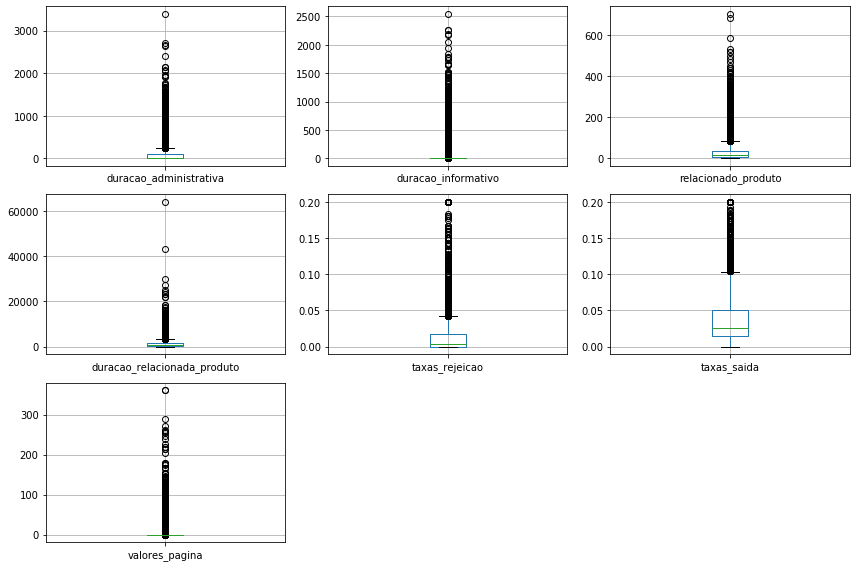

In [13]:
#Plot das variáveis continuas

#Tamanho da área de plotagem
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(var_continuas):
  plt.subplot(3,3,i+1);
  df.boxplot(col);
  plt.tight_layout()

In [14]:
#transformação de log nas variáveis contínuas
var_continuas = np.log1p(1+var_continuas)
var_continuas

,duracao_administrativa,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina
0,0.693147,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147
1,0.693147,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147
2,0.000000,0.000000,1.098612,0.000000,0.788457,0.788457,0.693147
3,0.693147,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147
4,0.693147,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147
...,...,...,...,...,...,...,...
12325,4.990433,0.693147,4.007333,7.487617,0.696712,0.707558,2.656176
12326,0.693147,0.693147,1.945910,6.147934,0.693147,0.703757,0.693147
12327,0.693147,0.693147,2.079442,5.227090,0.733969,0.735568,0.693147
12328,4.343805,0.693147,2.833213,5.852202,0.693147,0.703618,0.693147


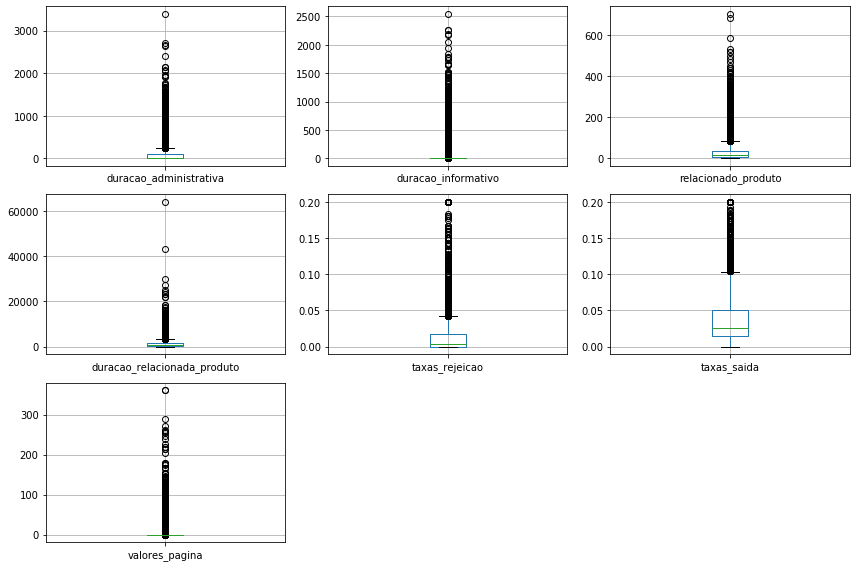

In [15]:
#Plot das variáveis continuas

#Tamanho da área de plotagem
fig = plt.figure(figsize=(12,8))

for i, col in enumerate(var_continuas):
  plt.subplot(3,3,i+1);
  df.boxplot(col);
  plt.tight_layout()

plt.savefig('boxplot2.png')

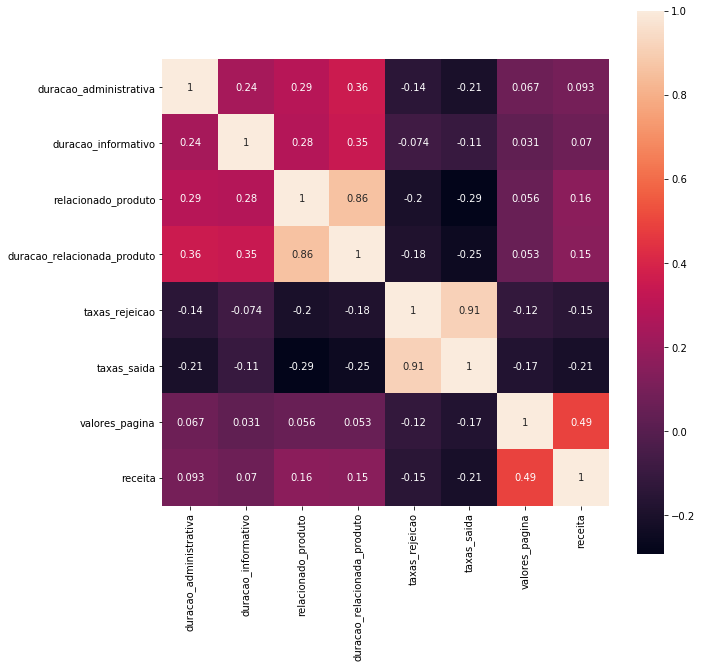

In [16]:
#Área de plotagem
plt.figure(figsize=(10,10))

matrix = df[['duracao_administrativa','duracao_informativo','relacionado_produto',
             'duracao_relacionada_produto','taxas_rejeicao','taxas_saida',
             'valores_pagina','receita']]
# Matriz de Correlação
ax = sns.heatmap(matrix.corr(), vmax=1., square=True, annot=True)
ax = ax


Text(0.5, 1.0, 'Vendas ou Não')

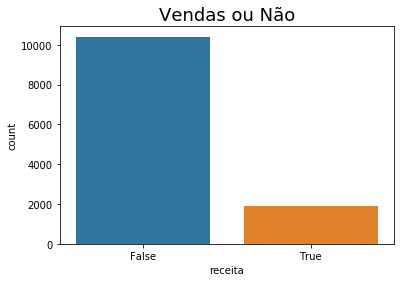

In [17]:
ax = sns.countplot(var_categoricas['receita'])
plt.title('Vendas ou Não', size=18)


Text(0.5, 1.0, 'Tipo de Visitantes')

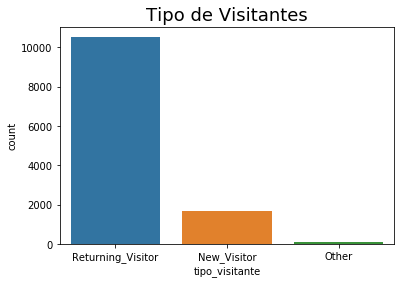

In [18]:
#Tipo de Visitantes
ax = sns.countplot(var_categoricas['tipo_visitante'])
plt.title('Tipo de Visitantes', size=18)

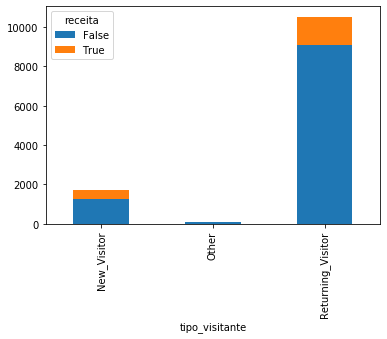

In [19]:
pd.crosstab(df['tipo_visitante'], df['receita']).plot(kind='bar',
                                                      stacked=True)

O visitantes recorretes são os que mais concretizam as compras, aparentimente normal uma vez que o usuário já vistou o site antes gostou do que viu e retornou efitivando a compra.

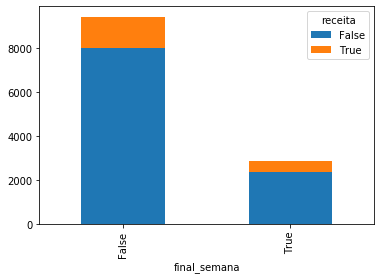

In [20]:
#Gráfico em relação a semana
pd.crosstab(df['final_semana'], df['receita']).plot(kind='bar',
                                                      stacked=True)

Existe uma efetividade nas compras mais durante a semana.

Text(0.5, 0, 'Sistema Operacionais')

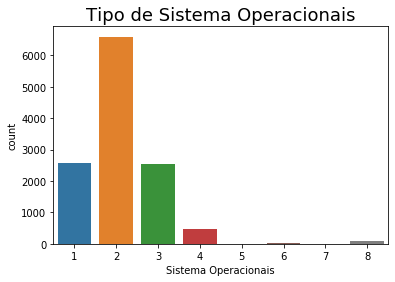

In [21]:
# Gráfico de Sistema Operacional

sns.countplot(df['sistemas_operacionais'])
plt.title('Tipo de Sistema Operacionais', size=18)
plt.xlabel('Sistema Operacionais')

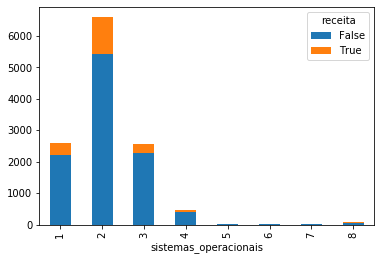

In [22]:
pd.crosstab(df['sistemas_operacionais'], df['receita']).plot(kind='bar',
                                                      stacked=True)

O sistema operacional tipo 2 além de possuir o maior volume de acesso também possui o maior numero de vendas.

obs. Requer maior atenção para a equipe de desevolvimento front e back end, pois uma falha pode impactar fortimente na receita.

Text(0.5, 0, 'Tráfego')

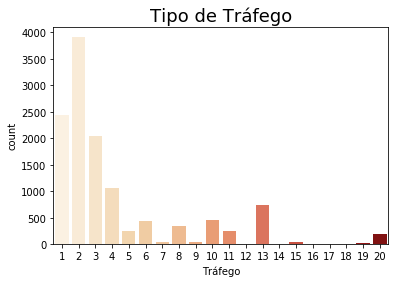

In [23]:
# Tipo de Trafego

sns.countplot(df['tipo_trafego'], palette="OrRd")
plt.title('Tipo de Tráfego', size=18)
plt.xlabel('Tráfego')

## Pré-Processamento dos Dados

In [24]:
df_original.head()

,administrativo,duracao_administrativa,informativo,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina,dia_especial,mes,sistemas_operacionais,navegador,regiao,tipo_trafego,tipo_visitante,final_semana,receita
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
# Criar o encoder
lb = LabelEncoder()

#Aplica  o encoder nas variáveis que estão como string
df_original['mes'] = lb.fit_transform(df_original['mes'])
df_original['tipo_visitante'] = lb.fit_transform(df_original['tipo_visitante'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [26]:
df_original.head()

,administrativo,duracao_administrativa,informativo,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina,dia_especial,mes,sistemas_operacionais,navegador,regiao,tipo_trafego,tipo_visitante,final_semana,receita
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [27]:
df_original.shape

(12316, 18)

In [28]:
#verificando se a variável resposta está Balanceada
target_count = df_original['receita'].value_counts()
target_count

False    10408
True      1908
Name: receita, dtype: int64

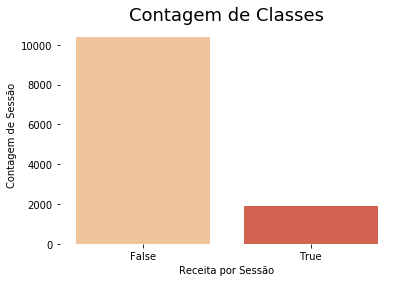

In [29]:
sns.countplot(df_original['receita'], palette="OrRd")
plt.box(False)
plt.title('Contagem de Classes', size=18)
plt.xlabel('Receita por Sessão')
plt.ylabel('Contagem de Sessão')
plt.show()

Nossa Variável Receita está totalmente desbalanceada, para resolver esse problema usarei a abordagem **Imblearn**

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

A proporção desejada do número de amostras na classe minoritária sobre o número de amostras na classe majoritária após a nova amostragem. 

In [30]:
#Instalar e importar o pacote imblern
!pip install -q imblearn
import imblearn

In [31]:
# Variáveis Explicativa
df_original.iloc[:, 0:17].head()

,administrativo,duracao_administrativa,informativo,duracao_informativo,relacionado_produto,duracao_relacionada_produto,taxas_rejeicao,taxas_saida,valores_pagina,dia_especial,mes,sistemas_operacionais,navegador,regiao,tipo_trafego,tipo_visitante,final_semana
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [32]:
# Variáveis Target
df_original.iloc[:, -1].head()

0    False
1    False
2    False
3    False
4    False
Name: receita, dtype: bool

In [33]:
#importa a função
from imblearn.over_sampling import SMOTE

seed = 100

#separa X e y
X = df_original.iloc[:,0:17]
y = df_original.iloc[:,-1]

#cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

#aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

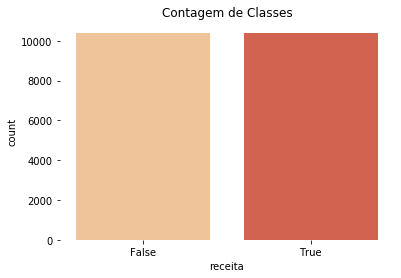

In [34]:
# plot
sns.countplot(y_res, palette='OrRd')
plt.box(False)
plt.xlabel=('Receita por Sessão')
plt.ylabel=('Contagem de Classes')
plt.title('Contagem de Classes')
plt.show()

In [35]:
# Divisão em Dados de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=42)

## Modelo SVM

### Modelo com Kernil Linear e Dados Padronizads (Scaled)

In [36]:
# Padronização
X_treino_scaled = StandardScaler().fit_transform(X_treino)
X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [37]:
modelo_v1 = svm.SVC(kernel = 'linear')

In [38]:
#Treinamento
modelo_v1.fit(X_treino, y_treino)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

In [40]:
SVM_dict_v1 = {
    'Modelo':'SVM',
    'Versão':'1',
    'Kernel':'Linear com Dados Padronizados',
    'Precision':precision_score(previsoes_v1, y_teste),
    'Recall':recall_score(previsoes_v1, y_teste),
    'F1 Score': f1_score(previsoes_v1, y_teste),
    'Acuracia':accuracy_score(previsoes_v1, y_teste),
    'AUC':roc_auc_score(y_teste,previsoes_v1)
}
SVM_dict_v1

{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.1843065693430657,
 'Recall': 0.38846153846153847,
 'F1 Score': 0.25,
 'Acuracia': 0.8359945872801082,
 'AUC': 0.5668911302387397}

## Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [41]:
modelo_v2 = svm.SVC(kernel = 'rbf')

#Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001, 0.001, 3*0.001])

#Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C=C_range)

#Grid Search
modelo_v2_grid_search_rbf =  GridSearchCV(modelo_v2, svm_param_grid, cv=3)

#Treinamento
modelo_v2_grid_search_rbf.fit(X_treino_scaled, y_treino)

#Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_:.2%}")
print(" ")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

Acurácia em Treinamento: 89.42%
 
Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [42]:
# Previsões 
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)


In [43]:
SVM_dict_v2 = {
    'Modelo':'SVM',
    'Versão':'1',
    'Kernel':'Linear com Dados Padronizados',
    'Precision':precision_score(previsoes_v2, y_teste),
    'Recall':recall_score(previsoes_v2, y_teste),
    'F1 Score': f1_score(previsoes_v2, y_teste),
    'Acuracia':accuracy_score(previsoes_v2, y_teste),
    'AUC':roc_auc_score(y_teste,previsoes_v2)
}
SVM_dict_v2

{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.5200729927007299,
 'Recall': 0.691747572815534,
 'F1 Score': 0.59375,
 'Acuracia': 0.8944519621109608,
 'AUC': 0.7398585490990145}

## Otimização de Hiperparâmetros com Grid Search e Kerne Polinomial


In [44]:
#criar o modelo
modelo_v3 = svm.SVC(kernel = 'poly')

#valores para o grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2,3,4])

#Grid de hiperparâmetros
param_grid_poly = dict(gamma=gamma_range, degree=d_range, coef0=r_range)

#grid search
modelo_v3_grid_search_poly = GridSearchCV(modelo_v3, param_grid_poly, cv=3)

#Treinamento
modelo_v3_grid_search_poly.fit(X_treino_scaled, y_treino)

#acurácia em treino
#Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_poly.best_score_:.2%}")
print(" ")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_poly.best_params_}")

Acurácia em Treinamento: 89.19%
 
Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [45]:
# Previsões 
previsoes_v3 = modelo_v3_grid_search_poly.predict(X_teste_scaled)

In [46]:
SVM_dict_v3 = {
    'Modelo':'SVM',
    'Versão':'1',
    'Kernel':'Linear com Dados Padronizados',
    'Precision':precision_score(previsoes_v3, y_teste),
    'Recall':recall_score(previsoes_v3, y_teste),
    'F1 Score': f1_score(previsoes_v3, y_teste),
    'Acuracia':accuracy_score(previsoes_v3, y_teste),
    'AUC':roc_auc_score(y_teste,previsoes_v3)
}
SVM_dict_v3

{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.4781021897810219,
 'Recall': 0.6986666666666667,
 'F1 Score': 0.5677139761646803,
 'Acuracia': 0.8920162381596752,
 'AUC': 0.7210974882810416}

In [47]:
resumo = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3),
                      })
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3
Modelo,SVM,SVM,SVM
Versão,1,1,1
Kernel,Linear com Dados Padronizados,Linear com Dados Padronizados,Linear com Dados Padronizados
Precision,0.184307,0.520073,0.478102
Recall,0.388462,0.691748,0.698667
F1 Score,0.25,0.59375,0.567714
Acuracia,0.835995,0.894452,0.892016
AUC,0.566891,0.739859,0.721097


In [48]:
Nv_teste = np.array(X.iloc[20]).reshape(1,-1)

In [49]:
## Fazendo Previsões com o Modelo Treinado
# novo registro
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, True]).reshape(1,-1)

In [50]:
#padronizando o registro
novo_x_scaled = StandardScaler().fit_transform(Nv_teste)
novo_x_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [51]:
#Previsão
previsao_novo_x = modelo_v2_grid_search_rbf.predict(novo_x_scaled)
previsao_novo_x

array([False])

In [71]:
Nv_teste = np.array(X.iloc[3]).reshape(1,-1)
print('Conj. Número: ', Nv_teste)
# novo registro
novo_x_scaled = StandardScaler().fit_transform(Nv_teste)
print('Números transformado: ',novo_x_scaled)
#Previsão
previsao_novo_x = modelo_v2_grid_search_rbf.predict(novo_x_scaled)
print(previsao_novo_x)

Conj. Número:  [[0.0 0.0 0.0 0.0 2.0 2.666666677 0.05 0.14 0.0 0.0 2 3 2 2 4 2 False]]
Números transformado:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[False]


# FIM